## Importing the required Packages

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime as dt 

In [2]:
df_tesla = pdr.get_data_stooq('TSLA')

### 1. Simple Moving Average

<AxesSubplot:xlabel='Date'>

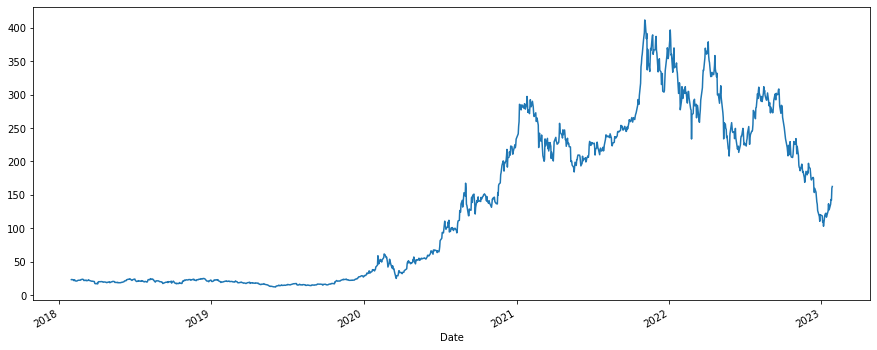

In [4]:
df_tesla['Open'].plot(figsize = (15,6))

<AxesSubplot:xlabel='Date'>

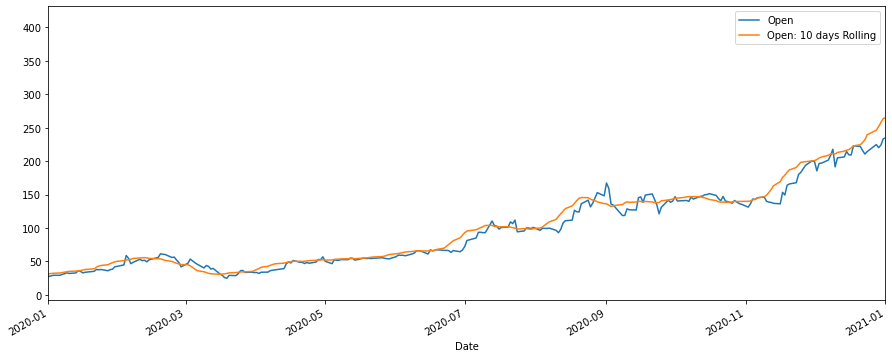

In [8]:
df_tesla['Open: 10 days Rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()
df_tesla[['Open','Open: 10 days Rolling']].plot(xlim = ['2020-01-01','2021-01-01'],figsize = (15,6))

Lets not stick to 10 days window and use 30,50 days window too. Then check which one suits our solution

In [9]:
df_tesla['Open: 30 days Rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()

In [10]:
df_tesla['Open: 50 days Rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

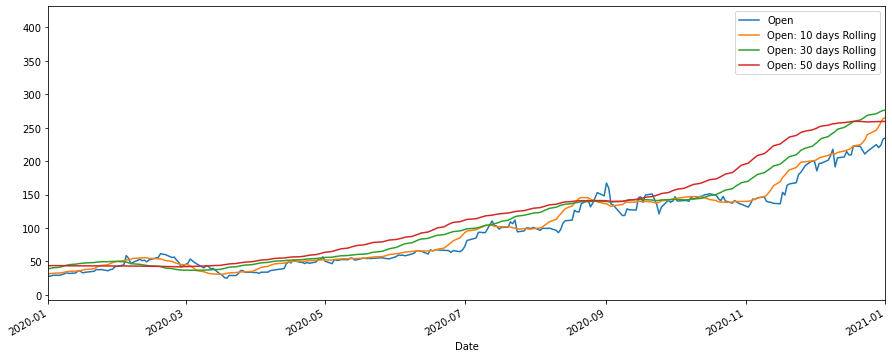

In [11]:
df_tesla[['Open','Open: 10 days Rolling','Open: 30 days Rolling', 'Open: 50 days Rolling']].plot(xlim = ['2020-01-01','2021-01-01'],figsize = (15,6))

### 2. Cummulative Moving Average

In [12]:
df_tesla['Open: CMA'] = df_tesla['Open'].expanding().mean()

<AxesSubplot:xlabel='Date'>

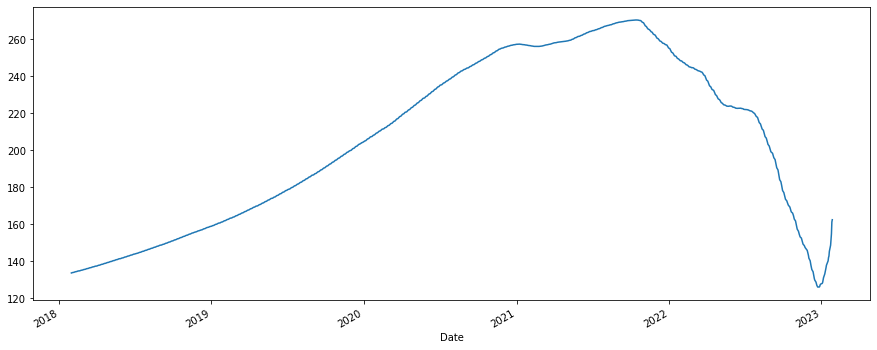

In [15]:
df_tesla['Open: CMA'].plot(figsize = (15,6))

### 3. EWMA (Exponential weighted moving average)

In [16]:
df_tesla['EMA:0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

# Smoothening factor alpha = 0.1
# This is simmple exponential moving average

<AxesSubplot:xlabel='Date'>

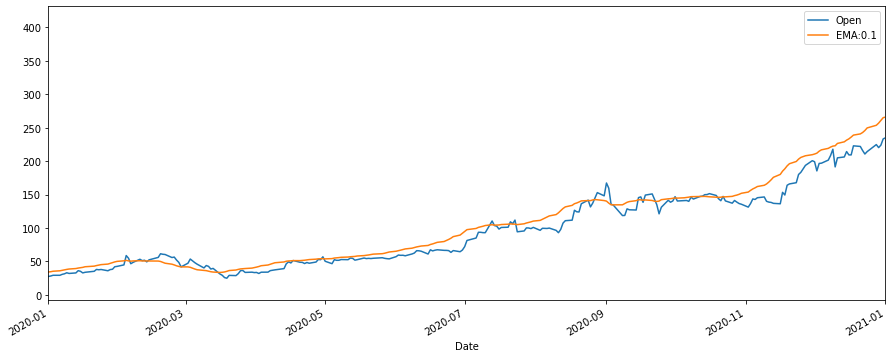

In [17]:
df_tesla[['Open','EMA:0.1']].plot(xlim = ['2020-01-01','2021-01-01'],figsize = (15,6))

In [18]:
# For exponential weighted moving average, we can use
df_tesla['EWMA: 5days'] = df_tesla['Open'].ewm(span = 5).mean()

<AxesSubplot:xlabel='Date'>

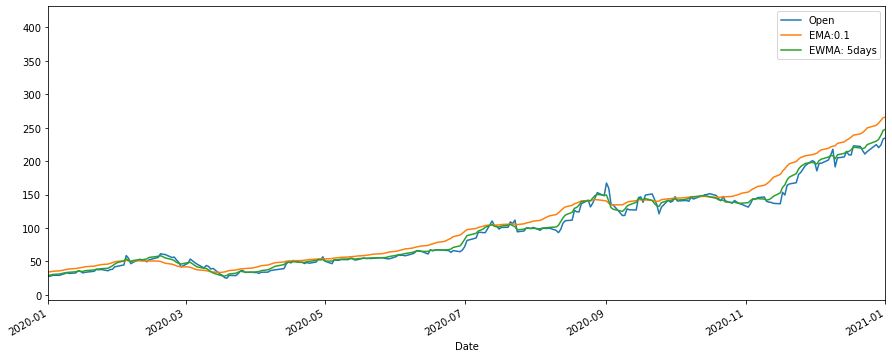

In [20]:
df_tesla[['Open','EMA:0.1','EWMA: 5days']].plot(xlim = ['2020-01-01','2021-01-01'],figsize = (15,6))